In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data_explore import viz

In [2]:
# zip file on Google Drive contains the file below https://drive.google.com/file/d/1XycdwSgR0RFz4X1bh_C-TwU9BGTe704c/view?usp=drive_link
# download this file and unzip it to the data folder - adjust the path below accordingly
fname = '../data/SOCATv2024-1d_005deg-colloc-r20250224/SOCATv2024_1d_005deg_collocated_2015-r20250224.pq'
df = pd.read_parquet(fname)
df.head(5)

sst_deg_c        sal    pppp_hpa  \
expocode     time_1d    lat_005 lon_005                                     
06AQ20141203 2015-01-01 -70.525 351.925  -1.628297  34.254623  992.383057   
             2015-01-02 -70.575 350.925  -1.549885  34.321327  986.000000   
                                350.975  -0.854400  34.318066  986.000000   
                        -70.525 350.975  -0.956750  34.309502  986.000000   
                                351.025  -0.824909  34.325909  986.000000   

                                           woa_sss  ncep_slp_hpa  \
expocode     time_1d    lat_005 lon_005                            
06AQ20141203 2015-01-01 -70.525 351.925  33.980877    991.667175   
             2015-01-02 -70.575 350.925  33.818001    985.900024   
                                350.975  33.818001    985.900024   
                        -70.525 350.975  33.818001    985.900024   
                                351.025  33.787998    985.900024   

                                         dist_to_land_km  fco2rec_uatm  \
expocode     time_1d    lat_005 lon_005                                  
06AQ20141203 2015-01-01 -70.525 351.925        67.000000    387.908463   
             2015-01-02 -70.575 350.925        66.770493    382.748426   
                                350.975        68.266670    336.618267   
                        -70.525 350.975        69.500000    361.268250   
                                351.025        71.272728    337.921273   

                                         fco2rec_flag  n_samples  \
expocode     time_1d    lat_005 lon_005                            
06AQ20141203 2015-01-01 -70.525 351.925             2       1005   
             2015-01-02 -70.575 350.925             2         61   
                                350.975             2         15   
                        -70.525 350.975             2          4   
                                351.025             2         11   

                                         chl_globcolour  ...  time_sstcci  \
expocode     time_1d    lat_005 lon_005                  ...                
06AQ20141203 2015-01-01 -70.525 351.925        0.210151  ...   2015-01-01   
             2015-01-02 -70.575 350.925        0.203763  ...   2015-01-03   
                                350.975        0.197458  ...   2015-01-03   
                        -70.525 350.975        0.214619  ...   2015-01-03   
                                351.025        0.209839  ...   2015-01-03   

                                         lat_sstcci  lon_sstcci  sss_cci  \
expocode     time_1d    lat_005 lon_005                                    
06AQ20141203 2015-01-01 -70.525 351.925  -70.525002  351.924988      NaN   
             2015-01-02 -70.575 350.925  -70.574997  350.924988      NaN   
                                350.975  -70.574997  350.975006      NaN   
                        -70.525 350.975  -70.525002  350.975006      NaN   
                                351.025  -70.525002  351.024994      NaN   

                                         sss_cci_random_error  lat_ssscci  \
expocode     time_1d    lat_005 lon_005                                     
06AQ20141203 2015-01-01 -70.525 351.925                   NaN     -70.625   
             2015-01-02 -70.575 350.925                   NaN     -70.625   
                                350.975                   NaN     -70.625   
                        -70.525 350.975                   NaN     -70.625   
                                351.025                   NaN     -70.625   

                                         lon_ssscci  time_ssscci  \
expocode     time_1d    lat_005 lon_005                            
06AQ20141203 2015-01-01 -70.525 351.925     351.875   2015-01-01   
             2015-01-02 -70.575 350.925     350.875   2015-01-02   
                                350.975     350.875   2015-01-02   
                        -70.525 350.975     350.875   2015-01-02   
       

In [3]:
df.sst_cci.groupby('expocode').count().sort_values()

expocode
11SS20150714       5
11SS20150713       6
316420141006       7
11SS20150604       8
316420151222       9
                ... 
09AR20150128    4260
320620150123    4295
33HQ20150809    5793
34FM20150603    5833
06AQ20150818    7513
Name: sst_cci, Length: 414, dtype: int64

In [4]:
m = viz.plot_interactive_cruise_map_lines(df)
m.save('../outputs/map.html')
# m

2025-02-28 12:47:15.153 | INFO     | data_explore.viz:plot_interactive_cruise_map_lines:31 - Preparing data for interactive map
2025-02-28 12:47:23.434 | INFO     | data_explore.viz:plot_interactive_cruise_map_lines:43 - Creating interactive map


## Plotting single cruise 

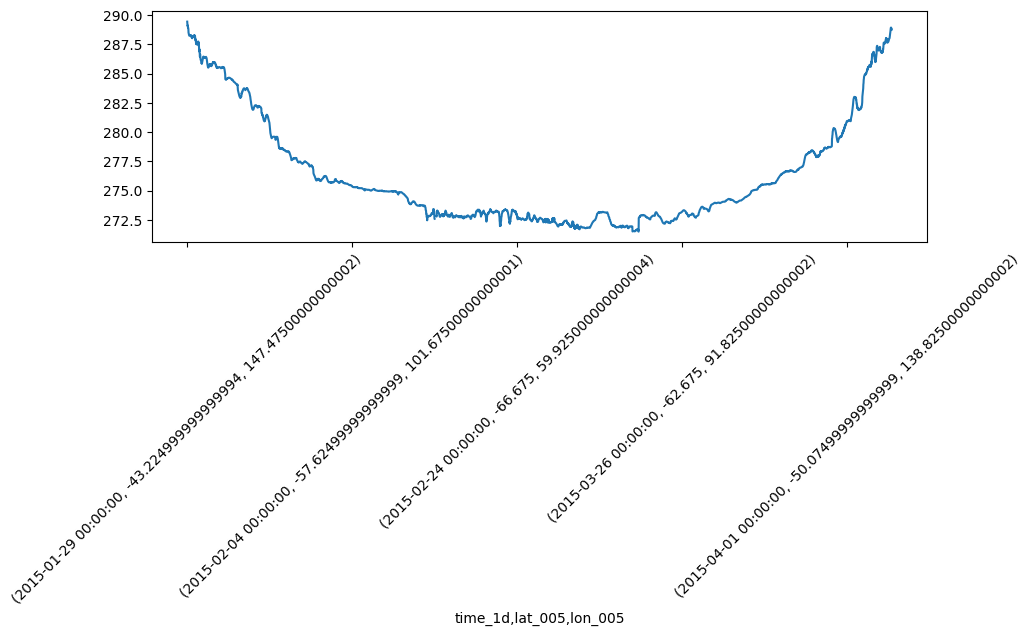

In [5]:
cruis_id = '09AR20150128'

fig, ax = plt.subplots(figsize=(10, 3))
ser_cruise = (
    df
    .loc[cruis_id]  # select the cruise 
    .sort_values(by='time_avg')  # sort by time
    .sst_cci  # select the SST CCI data
    # .pipe(viz.clean_indicies_for_plotting)
)
ser_cruise.plot(ax=ax, label='SST CCI')
plt.xticks(rotation=45)  
plt.show()

## From tabular to gridded data

`pandas` and `xarray` allow you to easily switch between the two IF you have the indicies/coordinates set up properly.  
In the tabular parquet files that contain the training data, the indicies are `['expocode', 'time', 'lat', 'lon']` 👍  
Note this only works when the data is on a regular grid. If continuous data, then the grid will be too large and you'll get a memory error.

We can select a single cruise using a single `expocode`

In [28]:
ser_sst_cci_K = df.loc[cruis_id, 'sst_cci']  # select the cruise that we want with satellite temperature data
ser_sst_cci_C = ser_sst_cci_K - 273.15  # convert to Celsius

map = viz.plot_cruise_interactive_scatter_map(ser_sst_cci_C, cmap='coolwarm')
map  # uncomment to show the map

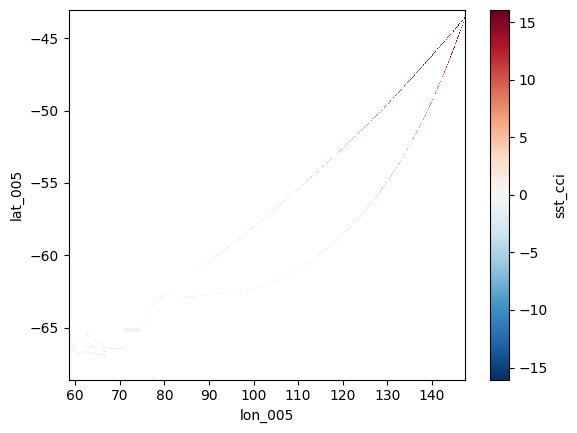

In [17]:
da_sst_cci = (
    ser_sst_cci_C
    .to_xarray()  # does all the work for us
    .mean(dim='time_1d')  # let's average over time
    .sortby(variables=['lat_005', 'lon_005'])  # but for plotting, we have to make sure coordinates are sorted
)

img = da_sst_cci.plot()